In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Data/ResumeDataSet.csv')
df.head()

Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...

In [3]:
df.shape

(962, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
df.describe()

Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18

In [6]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [7]:
print(df['Category'].unique())
print("Total number of categories: ", df['Category'].nunique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
Total number of categories:  25


In [8]:
categories = df['Category'].value_counts().reset_index()
display(categories)

index  Category
0              Java Developer        84
1                     Testing        70
2             DevOps Engineer        55
3            Python Developer        48
4               Web Designing        45
5                          HR        44
6                      Hadoop        42
7                  Blockchain        40
8               ETL Developer        40
9          Operations Manager        40
10               Data Science        40
11                      Sales        40
12        Mechanical Engineer        40
13                       Arts        36
14                   Database        33
15     Electrical Engineering        30
16         Health and fitness        30
17                        PMO        30
18           Business Analyst        28
19           DotNet Developer        28
20         Automation Testing        26
21  Network Security Engineer        25
22              SAP Developer        24
23             Civil Engineer        24
24                   Advocate        20

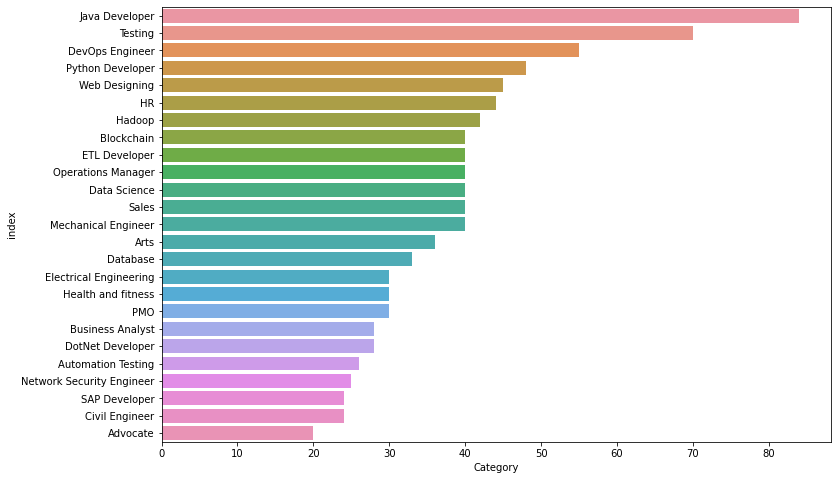

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x=categories['Category'], y=categories['index'])
plt.show()

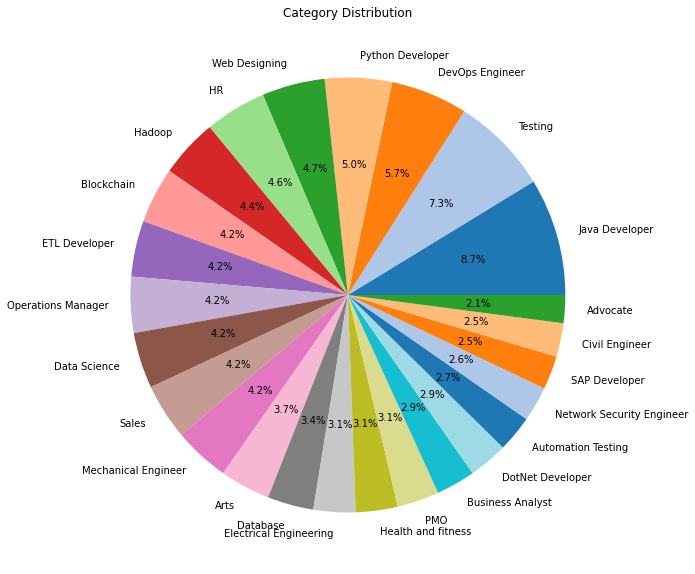

In [10]:
plt.figure(figsize=(10,10))
plt.pie(categories['Category'], labels=categories['index'],
        colors=sns.color_palette('tab20'), autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [11]:
from wordcloud import WordCloud

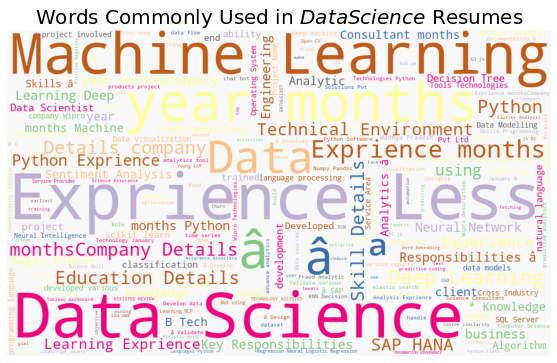

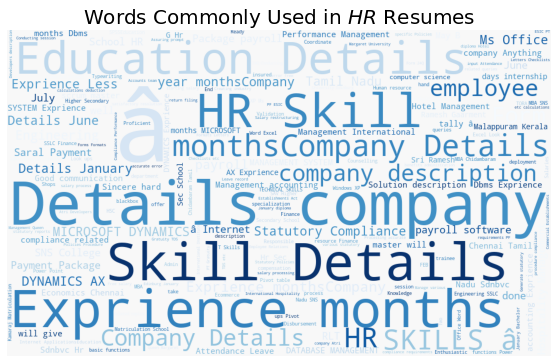

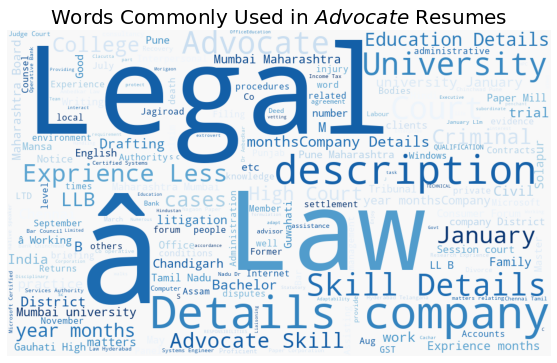

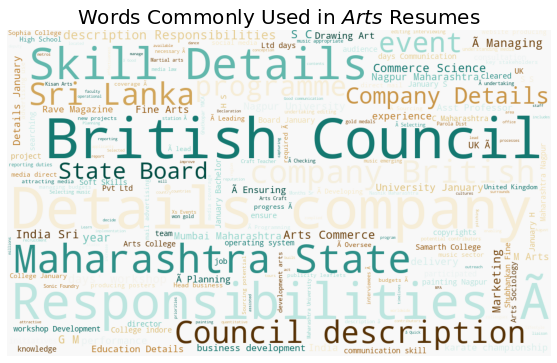

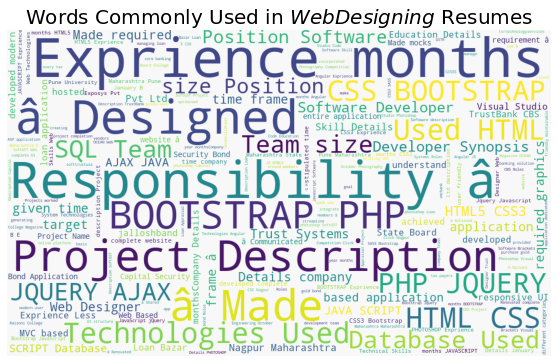

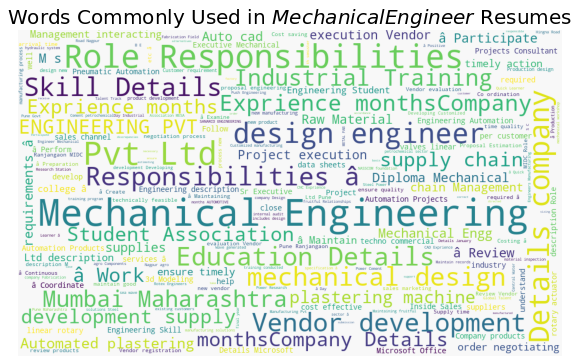

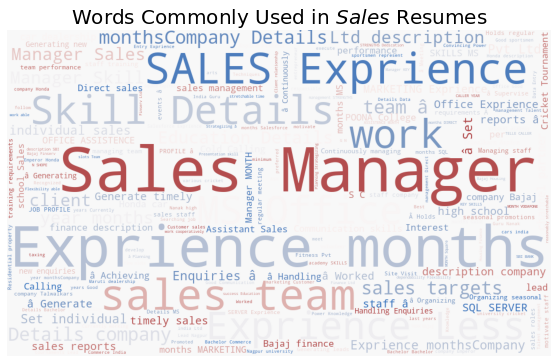

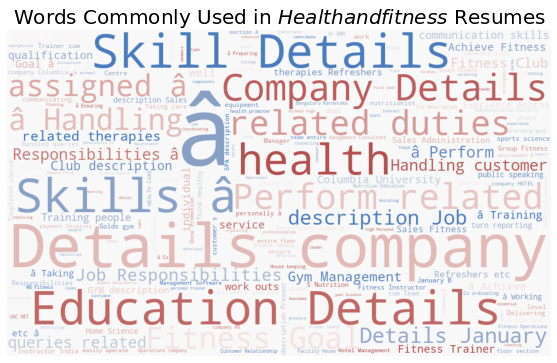

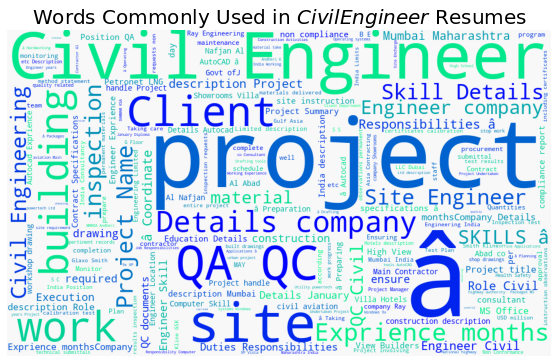

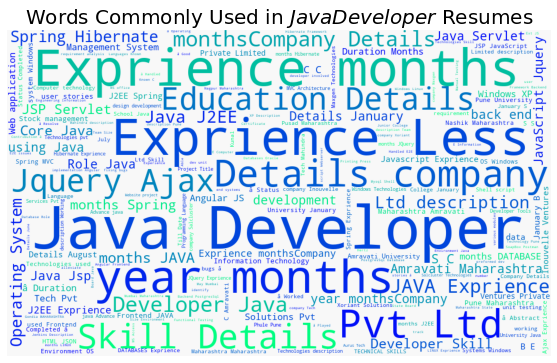

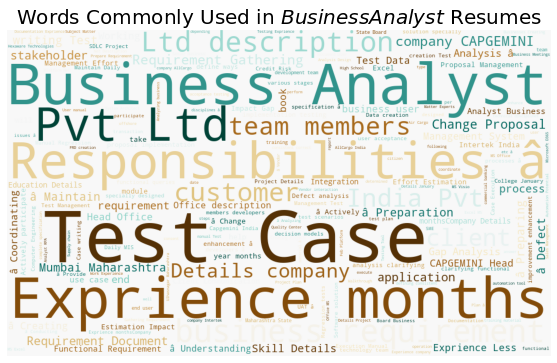

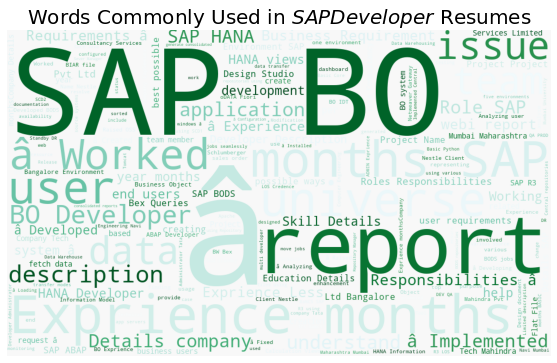

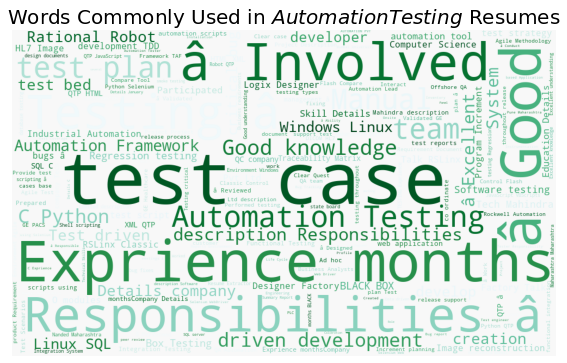

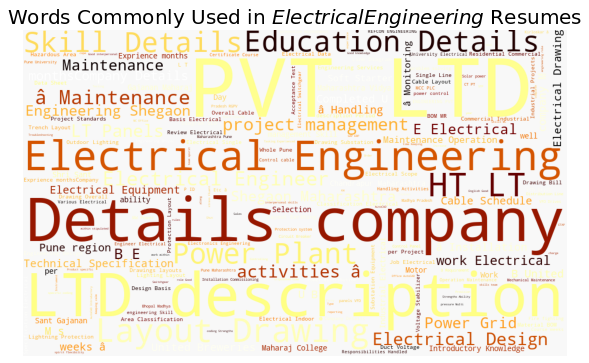

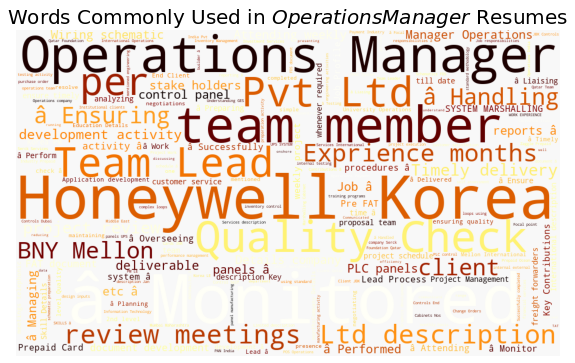

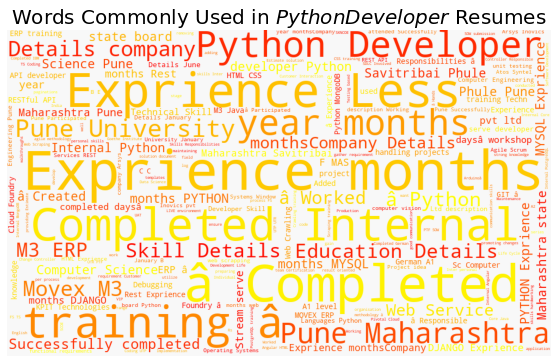

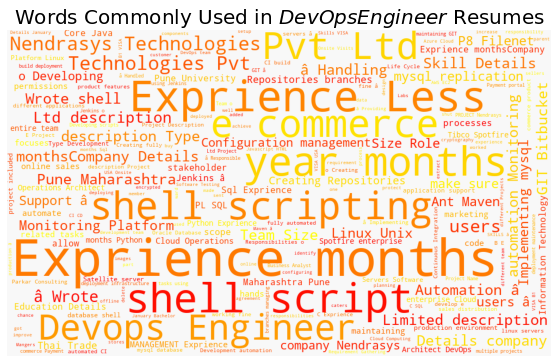

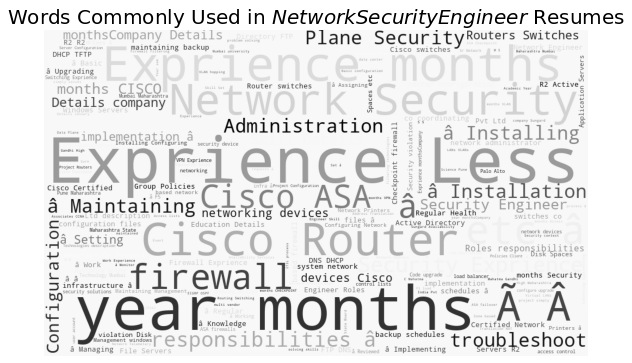

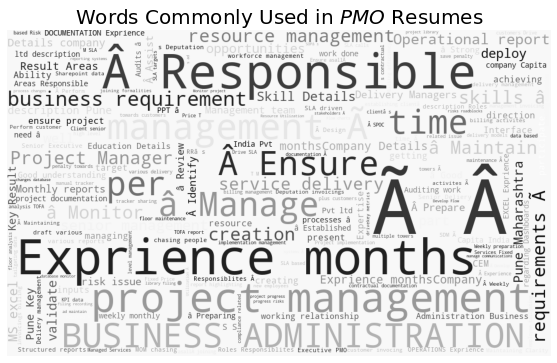

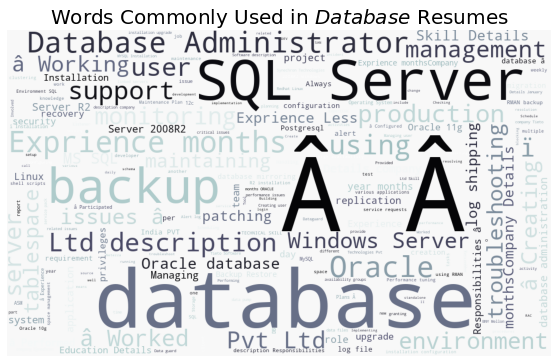

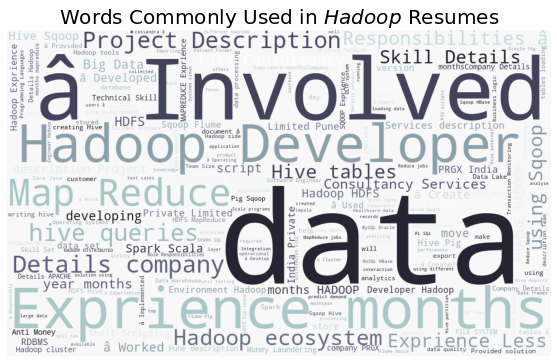

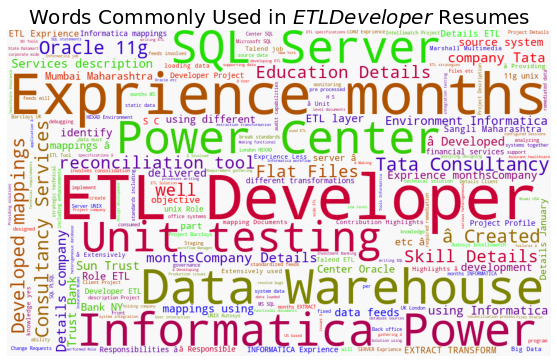

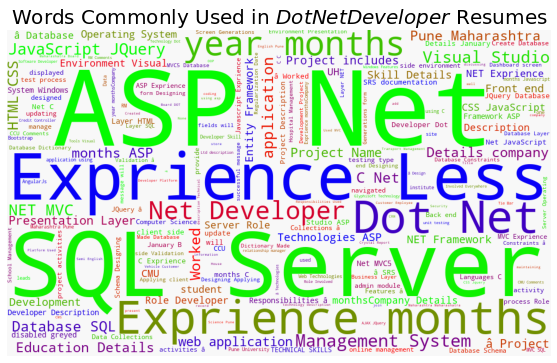

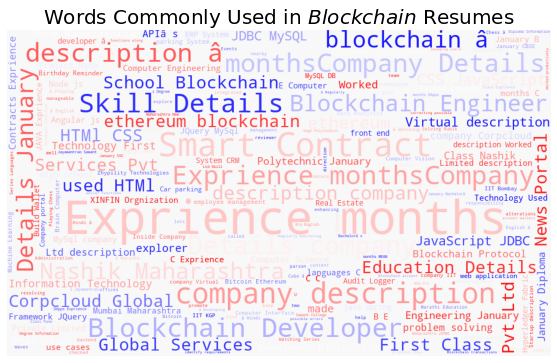

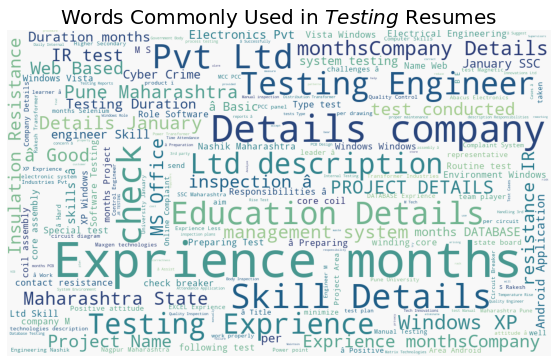

In [12]:
a=[ 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r','BrBG_r', 'BuGn', 'BuGn_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'crest_r']
for label, cmap in zip(df['Category'].unique(), a):
    text = df.query("Category == @label")["Resume"].str.cat(sep=" ")
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Resumes", size=20)
    plt.show()

Text(0.5, 1.0, 'Resume length distribution')

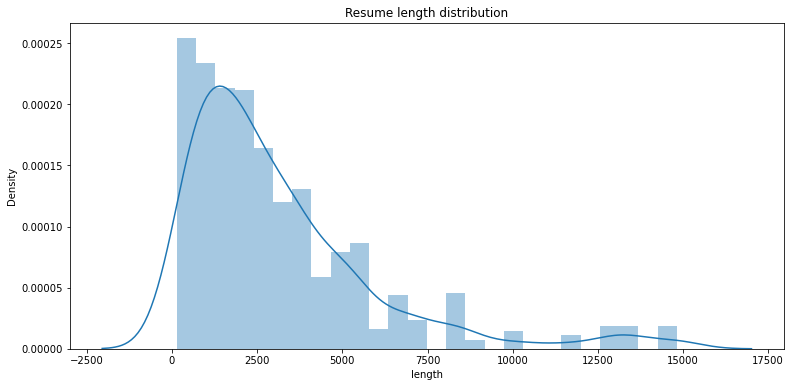

In [13]:
df['length'] = df['Resume'].str.len()
plt.figure(figsize=(12.8,6))
sns.distplot(df['length']).set_title('Resume length distribution')

In [14]:
df.head()

Category                                             Resume  length
0  Data Science  Skills * Programming Languages: Python (pandas...    4786
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...    1268
2  Data Science  Areas of Interest Deep Learning, Control Syste...    1871
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...     452

In [15]:
df['length'].describe()

count      962.000000
mean      3160.364865
std       2886.528521
min        142.000000
25%       1217.250000
50%       2355.000000
75%       4073.750000
max      14816.000000
Name: length, dtype: float64

In [16]:
import re
def clean_function(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [17]:
df['news'] = df['new'].apply(lambda x: clean_function(x))
df.head()

Category                                             Resume  length  \
0  Data Science  Skills * Programming Languages: Python (pandas...    4786   
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2  Data Science  Areas of Interest Deep Learning, Control Syste...    1871   
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

                                      Cleaned_Resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [18]:
le = preprocessing.LabelEncoder()
df['Category']= le.fit_transform(df['Category'])
df.head()

Category                                             Resume  length  \
0         6  Skills * Programming Languages: Python (pandas...    4786   
1         6  Education Details \r\nMay 2013 to May 2017 B.E...    1268   
2         6  Areas of Interest Deep Learning, Control Syste...    1871   
3         6  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...    6995   
4         6  Education Details \r\n MCA   YMCAUST,  Faridab...     452   

                                      Cleaned_Resume  
0  Skills Programming Languages Python pandas num...  
1  Education Details May 2013 to May 2017 B E UIT...  
2  Areas of Interest Deep Learning Control System...  
3  Skills R Python SAP HANA Tableau SAP HANA SQL ...  
4  Education Details MCA YMCAUST Faridabad Haryan...

In [19]:
df.to_csv("Data/CleanedLabelledResume.csv", index = False)

In [20]:
output = open('label.pkl', 'wb')
pickle.dump(le, output)
output.close()